In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("AirQualityUCI.csv")
df.shape

(9357, 16)

In [4]:
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [14]:
l=list(df["CO_level"].unique())
type(l)
print(l,type(l))

['Very High', 'High', 'Moderate', 'Low', 'Very low'] <class 'list'>


In [15]:
for num,var in enumerate(l):
    num+=1
    df["CO_level"].replace(var, num, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   Time          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   int64  
 4   NMHC_GT       9357 non-null   int64  
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   int64  
 7   Nox_GT        9357 non-null   int64  
 8   PT08_S3_Nox   9357 non-null   int64  
 9   NO2_GT        9357 non-null   int64  
 10  PT08_S4_NO2   9357 non-null   int64  
 11  PT08_S5_O3    9357 non-null   int64  
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
 15  CO_level      9357 non-null   int64  
dtypes: float64(5), int64(9), object(2)
memory usage: 1.1+ MB


In [17]:
df.isnull().sum()

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

In [18]:
df.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,2.903495
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,1.225437
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,1.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,2.000000
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2.000000
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,4.000000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,5.000000


In [19]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [20]:
df.corr()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
CO_GT,1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892,-0.806972
PT08_S1_CO,0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903,-0.202281
NMHC_GT,0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500,-0.157228
C6H6_GT,-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555,0.006655
PT08_S2_NMHC,0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572,-0.250478
Nox_GT,0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847,-0.627592
PT08_S3_Nox,-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618,0.340432
NO2_GT,0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440,-0.691575
PT08_S4_NO2,-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913,-0.068043
PT08_S5_O3,0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467,-0.295170


In [21]:
pd.crosstab(df["CO_GT"], df["CO_level"])

CO_level,1,2,3,4,5
CO_GT,,,,,
-200.0,0,0,0,0,1683
0.1,0,0,0,33,0
0.2,0,0,0,45,0
0.3,0,0,0,98,0
0.4,0,0,0,160,0
0.5,0,0,0,217,0
0.6,0,0,0,244,0
0.7,0,0,0,260,0
0.8,0,0,0,251,0


In [22]:
df_cols = df.columns

In [23]:
df_cols

Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH', 'CO_level'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   Time          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   int64  
 4   NMHC_GT       9357 non-null   int64  
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   int64  
 7   Nox_GT        9357 non-null   int64  
 8   PT08_S3_Nox   9357 non-null   int64  
 9   NO2_GT        9357 non-null   int64  
 10  PT08_S4_NO2   9357 non-null   int64  
 11  PT08_S5_O3    9357 non-null   int64  
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
 15  CO_level      9357 non-null   int64  
dtypes: float64(5), int64(9), object(2)
memory usage: 1.1+ MB


In [25]:
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,1
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,1
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,1
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,1
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,1


In [26]:
da=[]
for var in df["Date"]:
    try:
        temp = var.split("/")
        da.append(int(temp[1]))
    except:
        da.append(np.nan)

In [34]:
df1=df.join(pd.DataFrame({"date":da}))
df1.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,date
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,1,23
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,1,23
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,1,17
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,1,23
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,1,26


In [35]:
da1=[]
for var in df["Time"]:
    try:
        temp = var.split(":")
        temp1=(int(temp[0])+int(temp[1])+int(temp[2]))/3
        da1.append(temp1)
    except:
        da1.append(np.nan)

In [36]:
df2=df1.join(pd.DataFrame({"time":da1}))
df2.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,date,time
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,1,23,6.333333
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,1,23,6.666667
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,1,17,6.000000
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,1,23,6.000000
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,1,26,6.000000


In [37]:
df3 = df2.drop(["Date","Time"], axis=1)
df3.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,date,time
0,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,1,23,6.333333
1,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,1,23,6.666667
2,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,1,17,6.000000
3,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,1,23,6.000000
4,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,1,26,6.000000


In [38]:
df3.columns

Index(['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'Nox_GT',
       'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH',
       'CO_level', 'date', 'time'],
      dtype='object')

In [39]:
df3_cols=df3.columns
df3_cols

Index(['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'Nox_GT',
       'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH',
       'CO_level', 'date', 'time'],
      dtype='object')

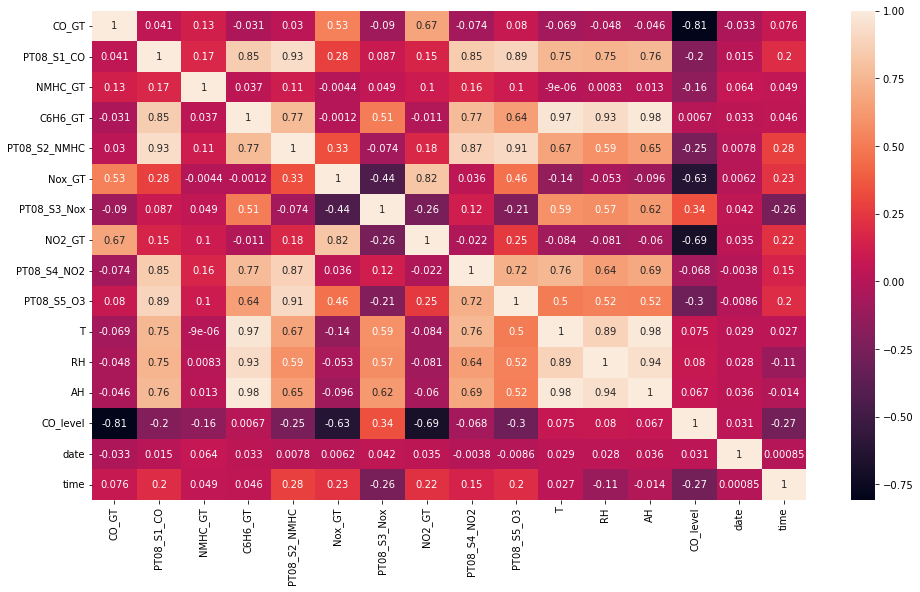

In [40]:
plt.figure(figsize=(16,9))
sns.heatmap(df3.corr(), annot=True)
plt.show()

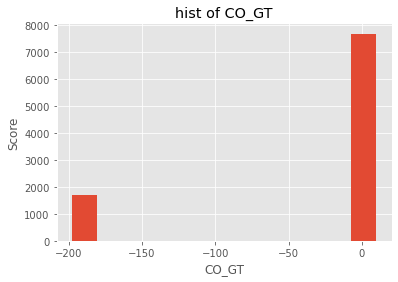

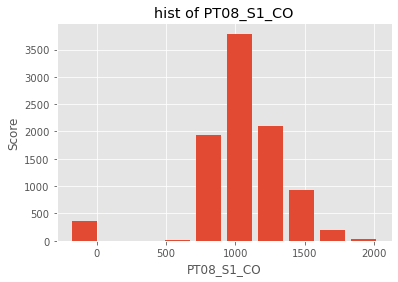

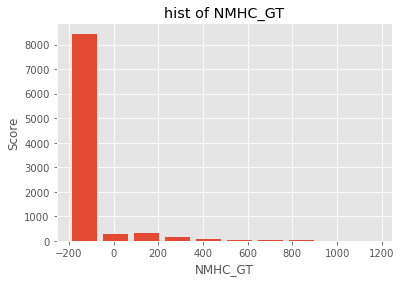

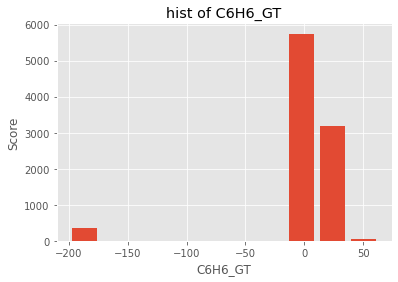

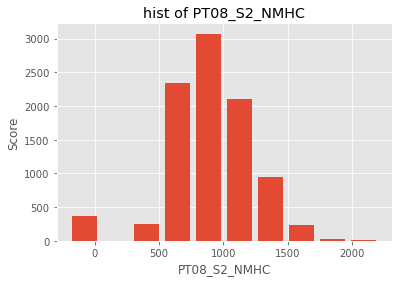

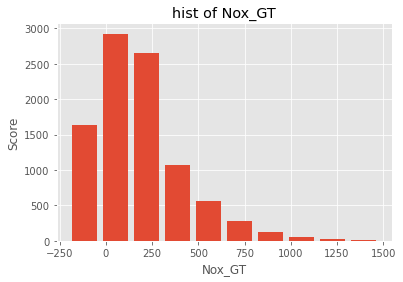

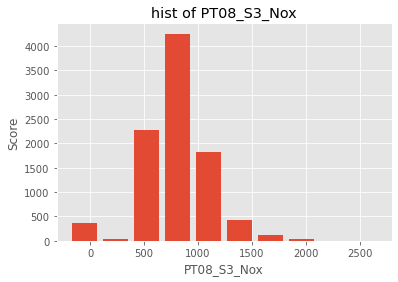

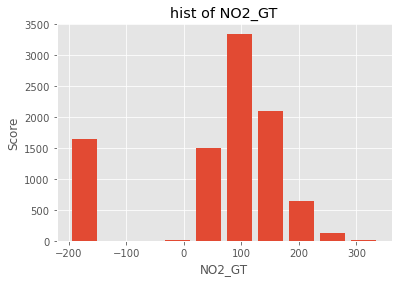

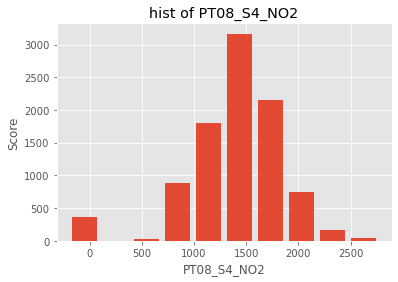

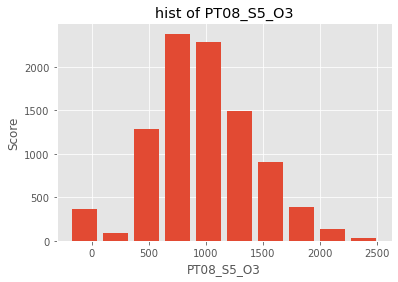

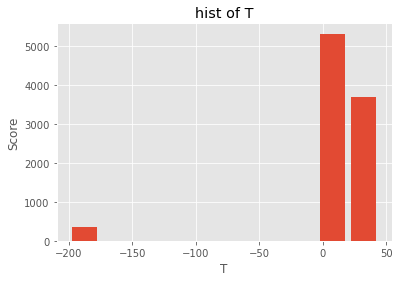

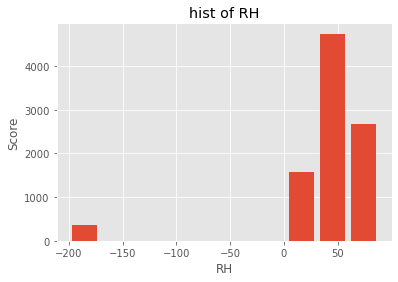

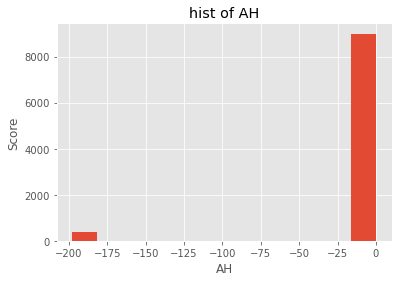

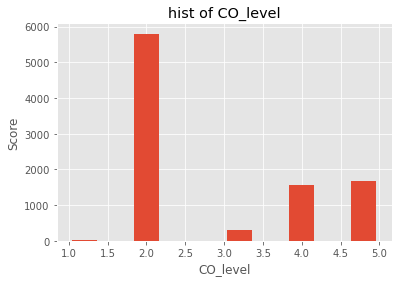

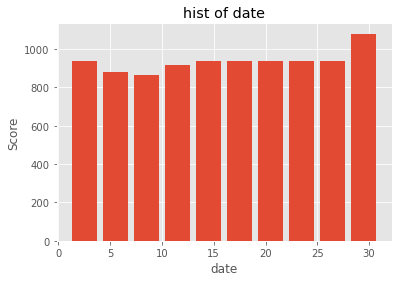

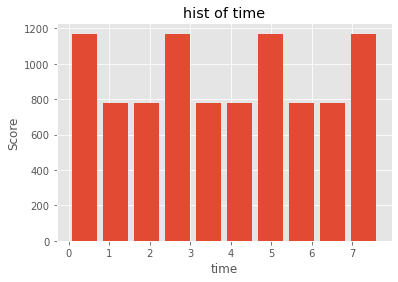

In [43]:
from matplotlib import style
style.use("ggplot")
for var in df3_cols:
    plt.hist(df3[var], rwidth=0.8)
    plt.title(f"hist of {var}")
    plt.xlabel(f"{var}")
    plt.ylabel("Score")
    plt.show()

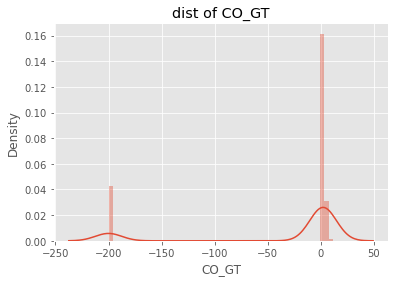

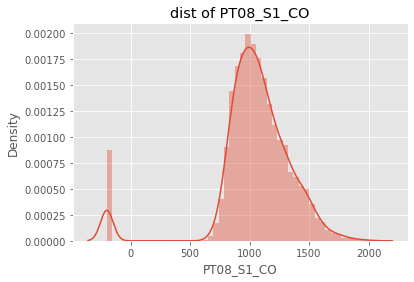

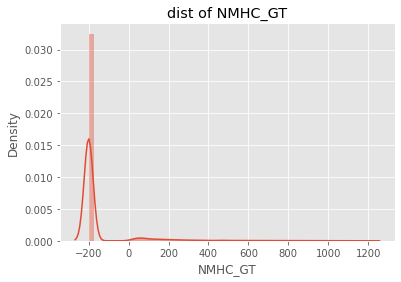

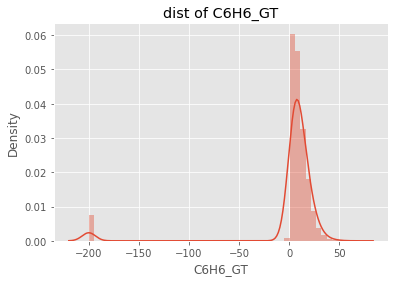

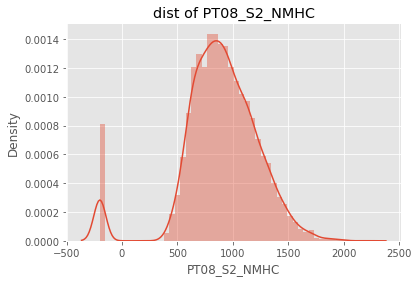

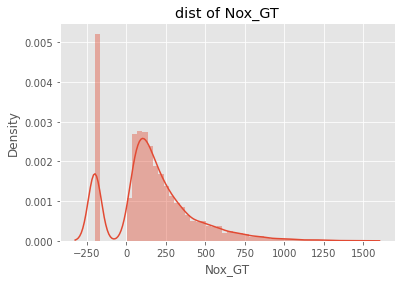

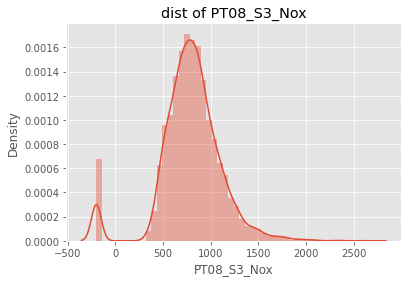

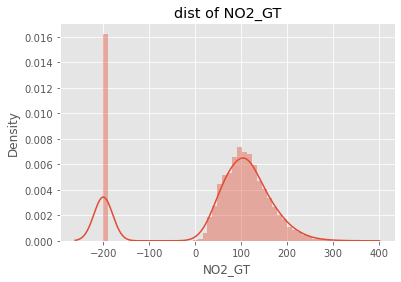

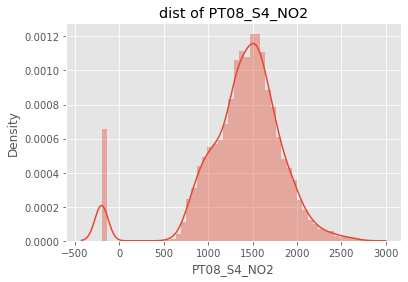

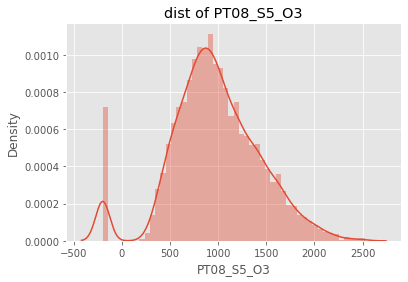

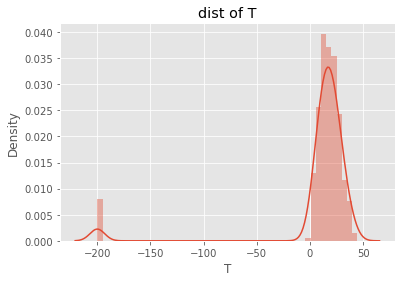

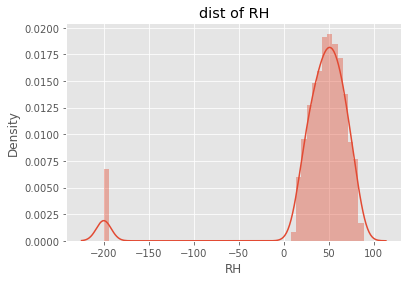

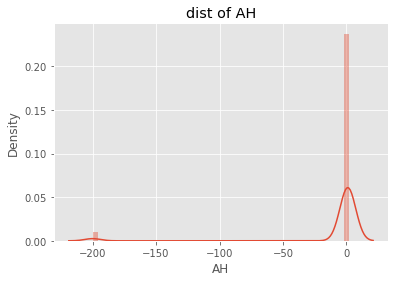

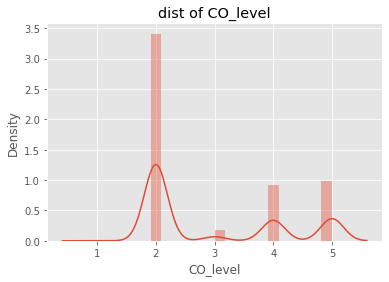

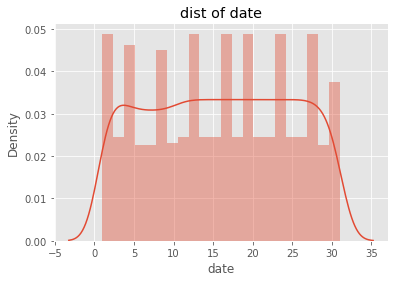

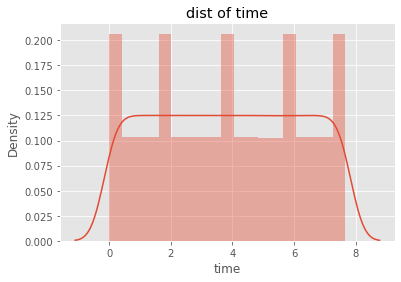

In [56]:
for var in df3_cols:
    sns.distplot(df3[var])
    plt.title(f"dist of {var}")
    plt.show()

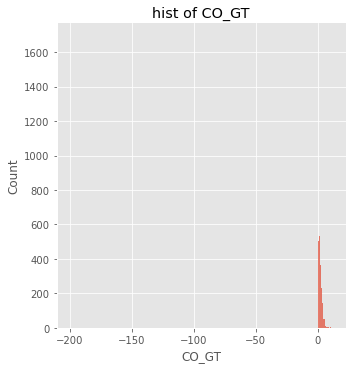

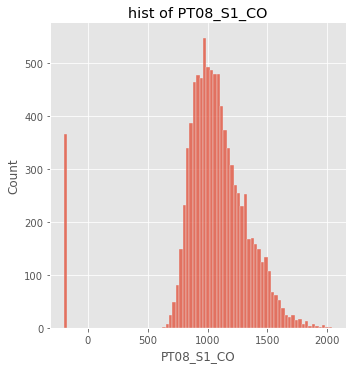

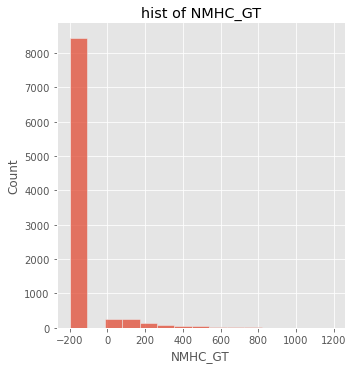

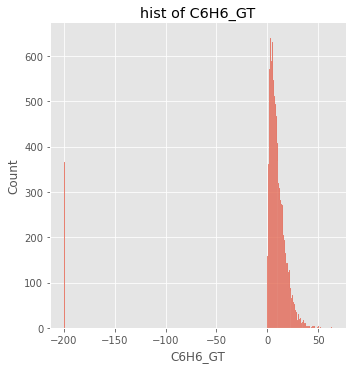

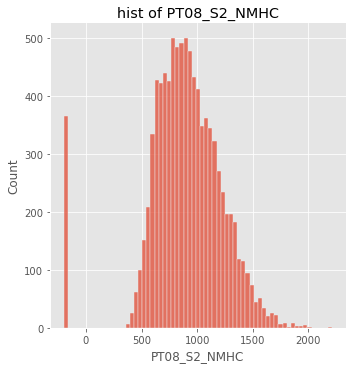

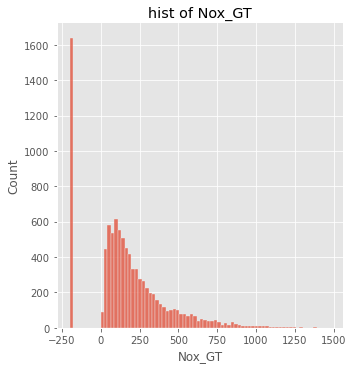

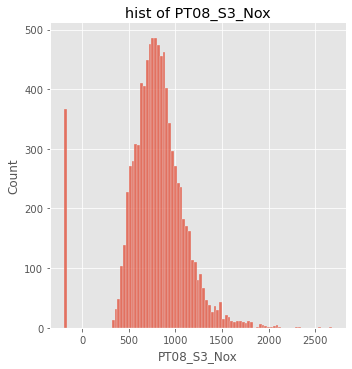

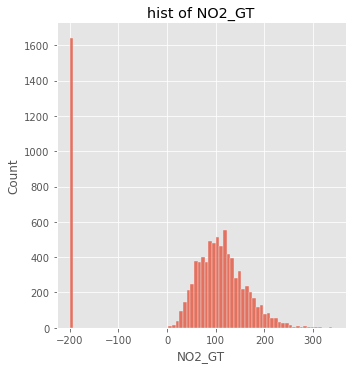

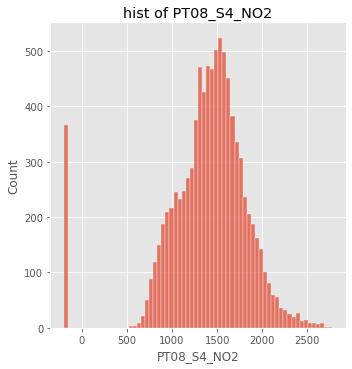

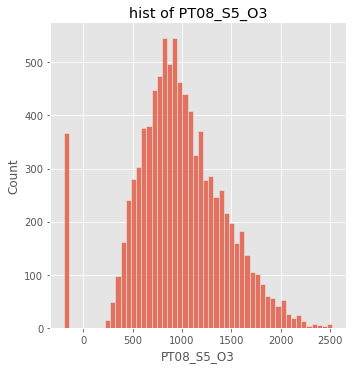

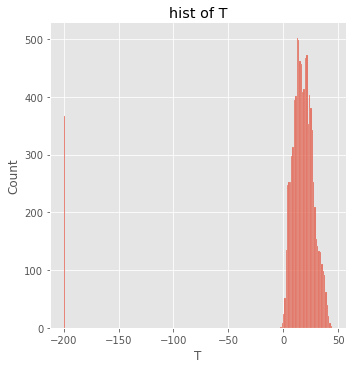

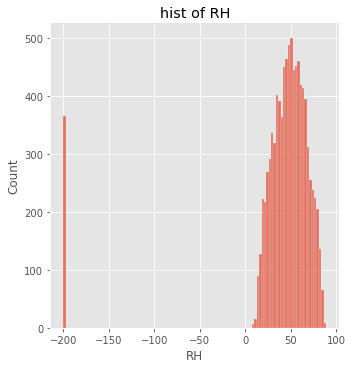

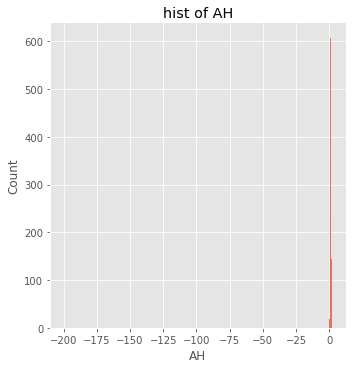

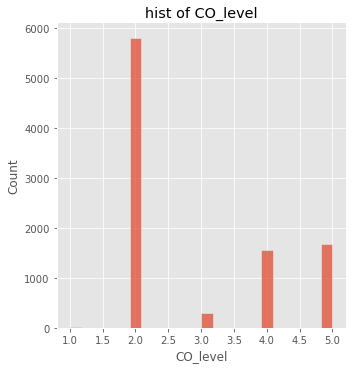

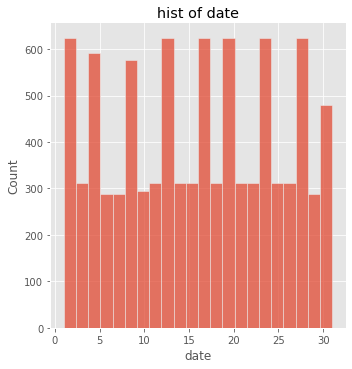

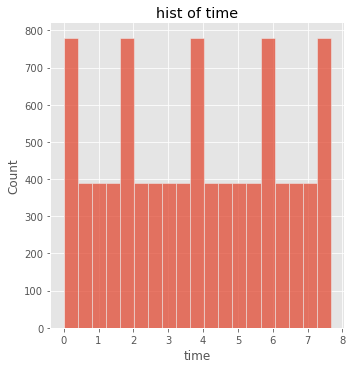

In [48]:
for var in df3_cols:
    sns.displot(df3[var])
    plt.title(f"hist of {var}")
    plt.show()

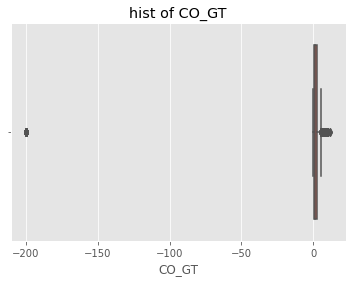

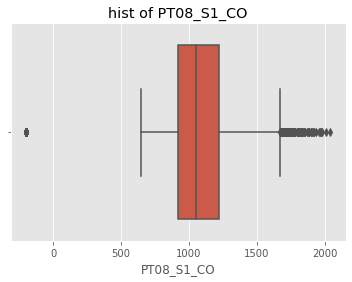

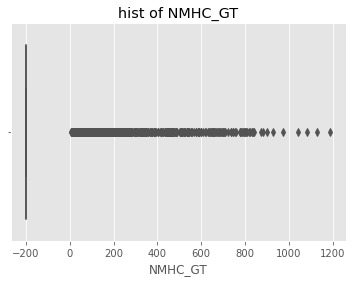

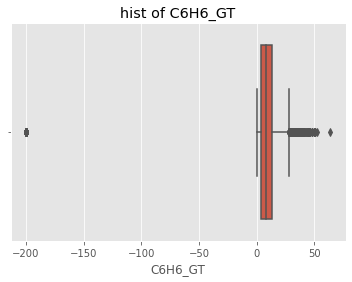

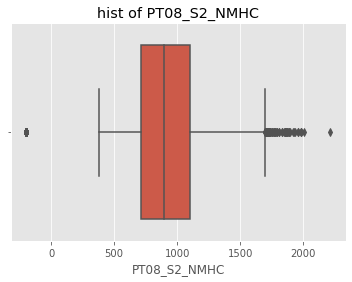

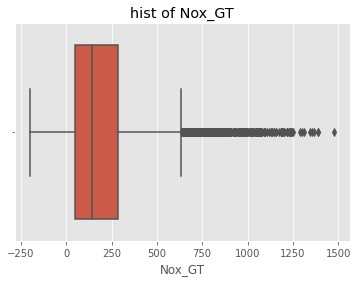

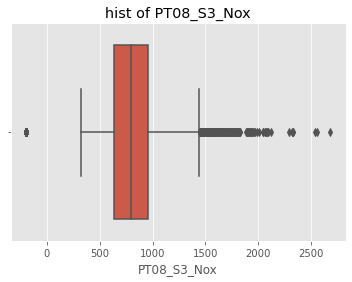

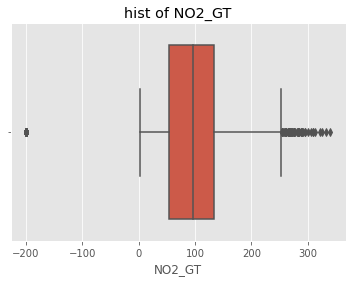

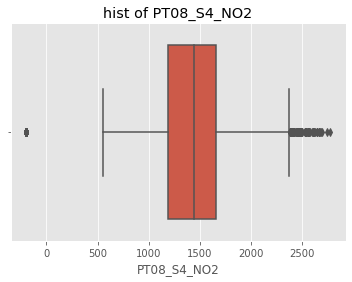

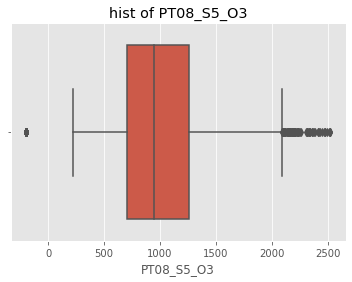

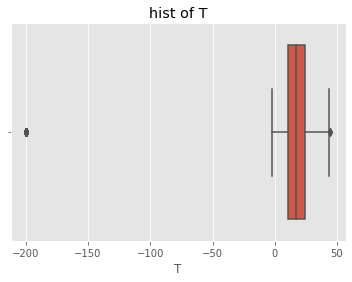

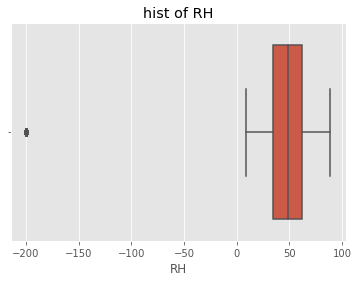

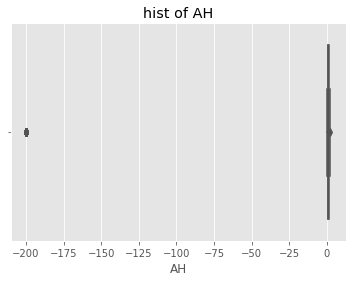

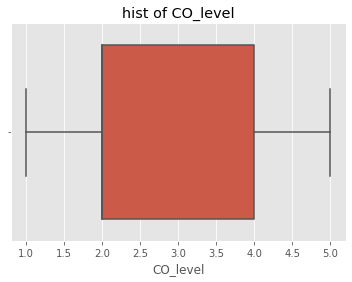

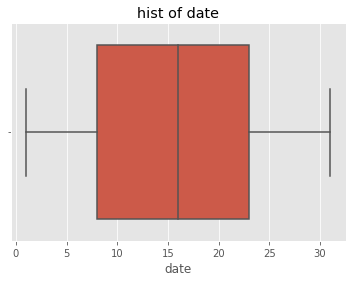

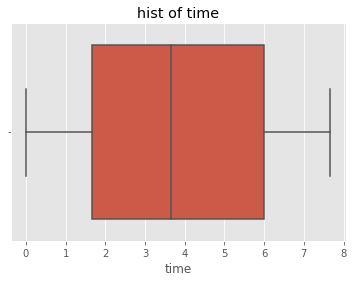

In [49]:
for var in df3_cols:
    sns.boxplot(df3[var])
    plt.title(f"hist of {var}")
    plt.show()

In [53]:
df3_cols

Index(['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'Nox_GT',
       'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH',
       'CO_level', 'date', 'time'],
      dtype='object')

In [55]:
li=['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'Nox_GT',
       'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH', 'date', 'time']

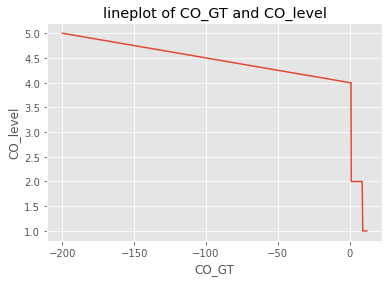

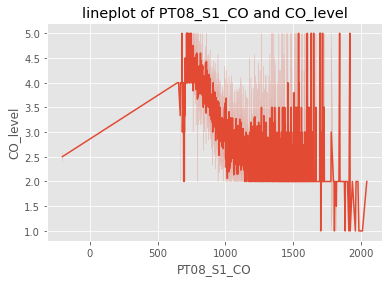

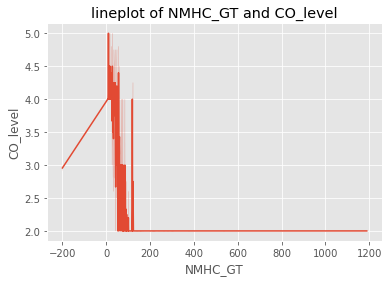

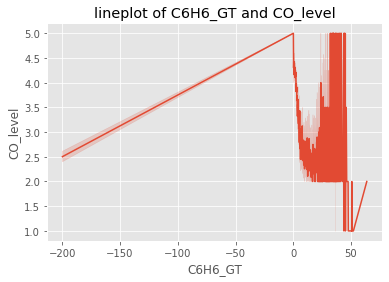

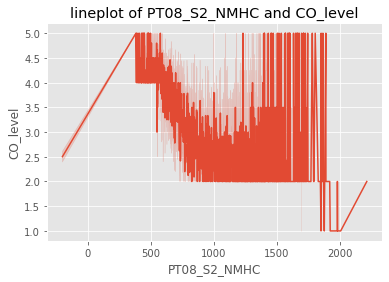

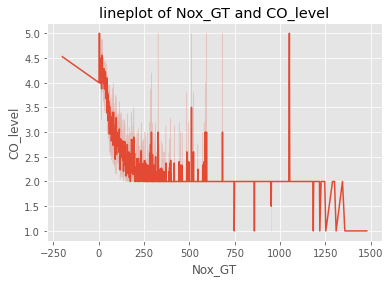

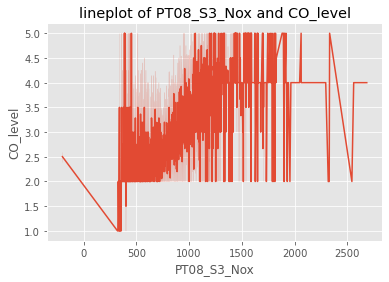

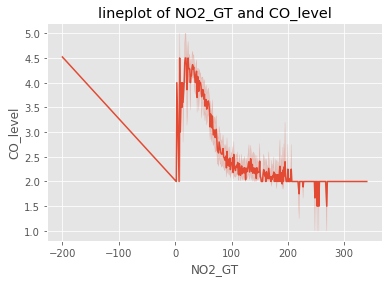

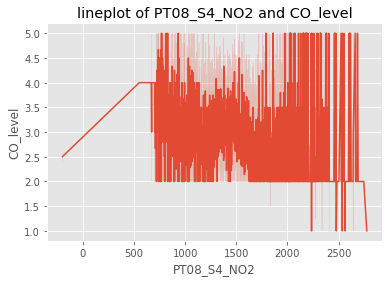

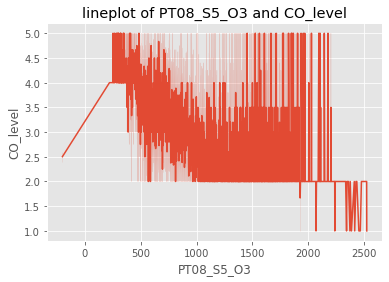

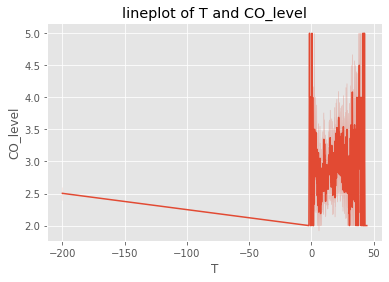

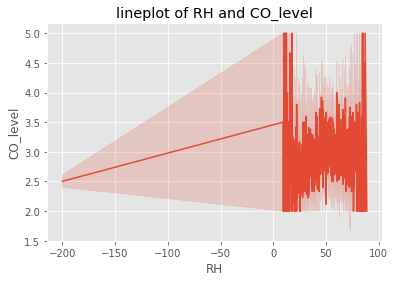

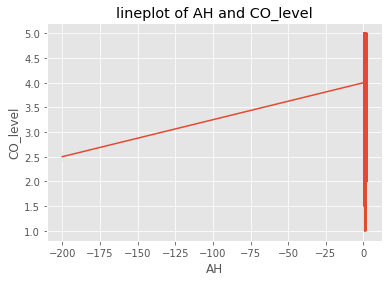

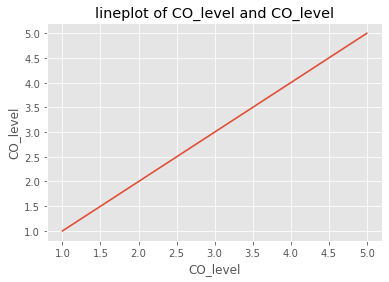

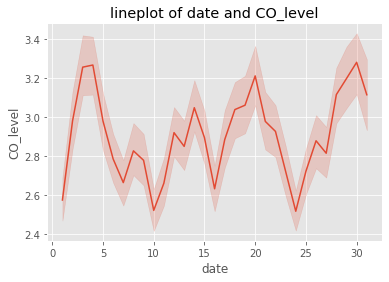

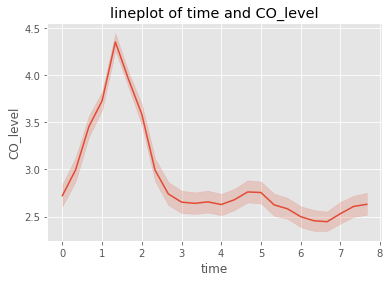

In [57]:
for var in df3_cols:
    sns.lineplot(df3[var], df3["CO_level"])
    plt.title(f"lineplot of {var} and CO_level")
    plt.show()

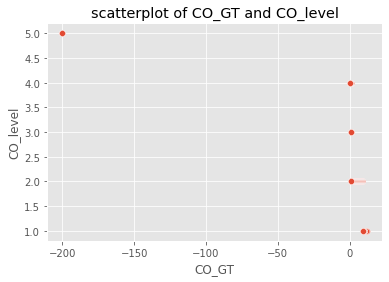

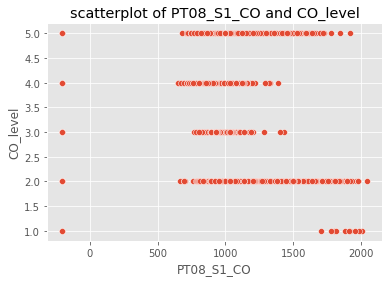

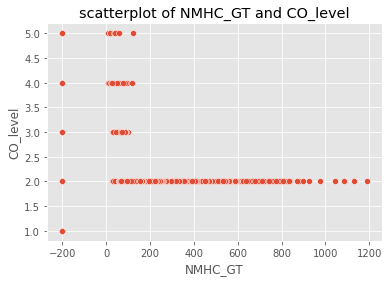

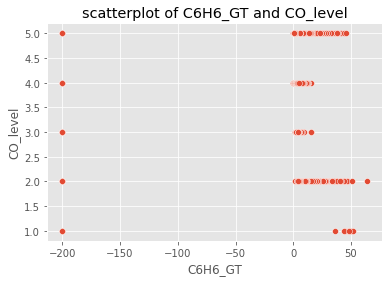

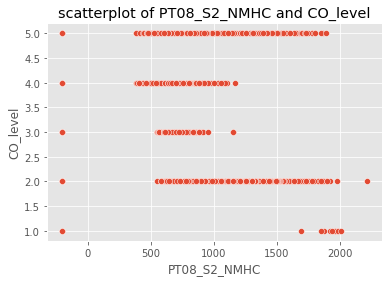

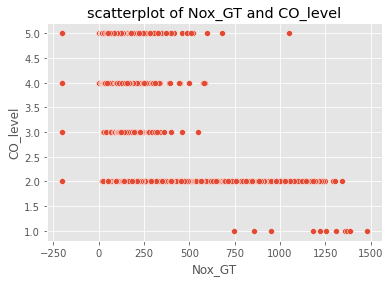

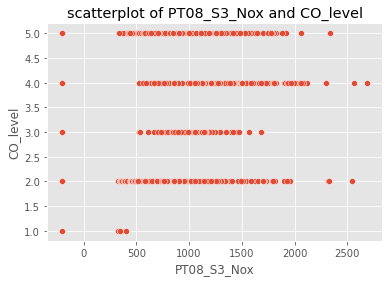

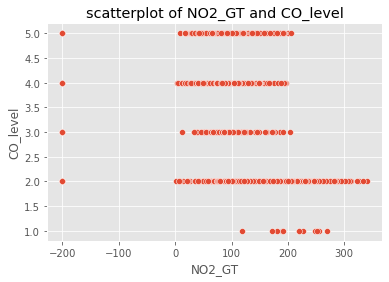

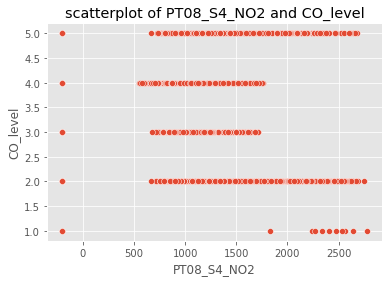

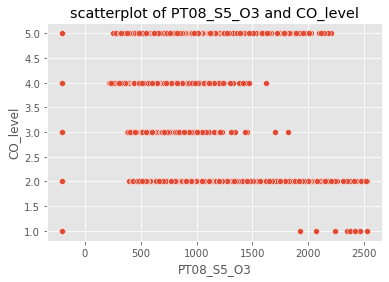

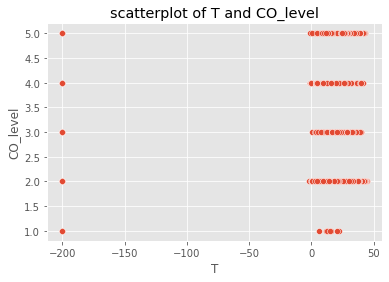

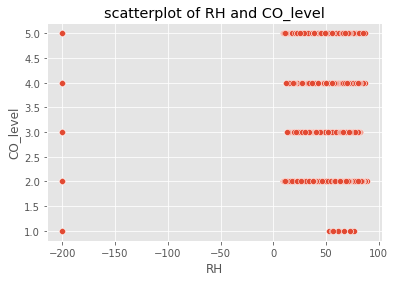

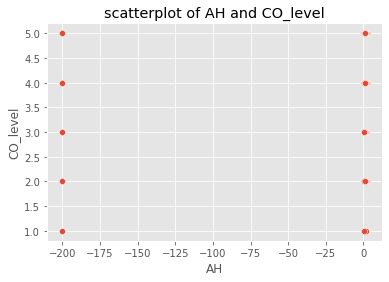

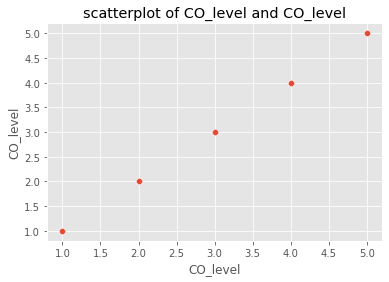

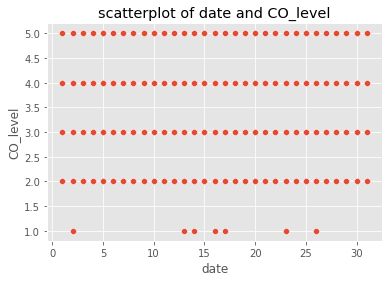

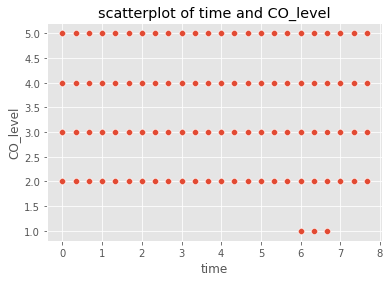

In [60]:
for var in df3_cols:
    sns.scatterplot(df3[var], df3["CO_level"])
    plt.title(f"scatterplot of {var} and CO_level")
    plt.show()

In [62]:
df3.to_csv("main_dataframe.csv", index=False)

In [67]:
X = df3.drop("CO_level", axis=1)
y = df3["CO_level"]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9198717948717948

In [72]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred1 = svc.predict(X_test)
accuracy_score(y_test, y_pred1)

0.9166666666666666

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)
accuracy_score(y_test, y_pred2)

1.0

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
accuracy_score(y_test, y_pred3)

0.9978632478632479

In [75]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred4 = ada.predict(X_test)
accuracy_score(y_test, y_pred4)

0.9674145299145299

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)
y_pred5 = gbr.predict(X_test)
accuracy_score(y_test, y_pred5)

1.0

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred6 = knc.predict(X_test)
accuracy_score(y_test, y_pred6)

0.9188034188034188

In [78]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred7 = gnb.predict(X_test)
accuracy_score(y_test, y_pred7)

0.9161324786324786

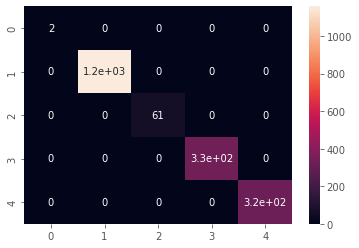

[[   2    0    0    0    0]
 [   0 1158    0    0    0]
 [   0    0   61    0    0]
 [   0    0    0  333    0]
 [   0    0    0    0  318]]


In [82]:
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True)
plt.show()
print(cm)

In [83]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00      1158
           3       1.00      1.00      1.00        61
           4       1.00      1.00      1.00       333
           5       1.00      1.00      1.00       318

    accuracy                           1.00      1872
   macro avg       1.00      1.00      1.00      1872
weighted avg       1.00      1.00      1.00      1872



In [84]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(gbr, X_train, y_train, cv=10)
cv, cv.mean()

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 1.0)

In [85]:
df3_cols

Index(['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'Nox_GT',
       'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH',
       'CO_level', 'date', 'time'],
      dtype='object')

In [86]:
def air_co_level_prediction(model, CO_GT, PT08_S1_CO, NMHC_GT, C6H6_GT, PT08_S2_NMHC, Nox_GT,
       PT08_S3_Nox, NO2_GT, PT08_S4_NO2, PT08_S5_O3, T, RH, AH, date, time):
#     for num,var in enumerate(df_value):
#         if var == Decision:
#             Decision = num
            
    x = np.zeros(len(X.columns))
    x[0] = CO_GT
    x[1] = PT08_S1_CO
    x[2] = NMHC_GT
    x[3] = C6H6_GT
    x[4] = PT08_S2_NMHC
    x[5] = Nox_GT
    x[6] = PT08_S3_Nox
    x[7] = NO2_GT
    x[8] = PT08_S4_NO2
    x[9] = PT08_S5_O3
    x[10] = T
    x[11] = RH
    x[12] = AH
    x[13] = date
    x[14] = time
    
    x = sc.transform([x])[0]
    return model.predict([x])[0]

In [87]:
import joblib

In [88]:
joblib.dump(gbr, "air_co_level_prediction_model.pkl")

['air_co_level_prediction_model.pkl']

In [90]:
model = joblib.load("air_co_level_prediction_model.pkl")

In [91]:
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,1
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,1
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,1
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,1
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,1


In [96]:
ans = air_co_level_prediction(model, CO_GT=11.9, PT08_S1_CO=2008, NMHC_GT=-200, C6H6_GT=50.6, PT08_S2_NMHC=1980, Nox_GT=1389,
       PT08_S3_Nox=75, NO2_GT=190, PT08_S4_NO2=2562, PT08_S5_O3=2342, T=12.4, RH=74.7, AH=1.0741, date=23, time=25)
ans

1

In [99]:
model.predict(X_test)

array([2, 4, 5, ..., 4, 2, 2], dtype=int64)

In [ ]:
import numpy as np
import pandas 